# Análise Exploratória - Dados de Reclamações

Resolva os exercícios propostos abaixo.

## Leitura e análise inicial dos dados

Abra o arquivo `../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv` que você criou no exercício de Limpeza de Dados e faça as análises e exibições iniciais do conteúdo.

Responda: Qual a média das idades das pessoas que reclamaram? Qual a idade máxima? Quantos valores únicos possuímos para a coluna `BAIRRO_ASS`?

**Dica:** A função len() pode ser usada para se obter o tamanho de listas, séries ou dataframes. Por exemplo, `len([1,3,9])` retorna 3.

In [1]:
#importing libraries
import pandas as pd

%matplotlib inline

# lê o arquivo CSV
df = pd.read_csv('../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv')

O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [2]:
df.head(10)

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE
0,2016-09-12,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,1,19
1,2016-12-11,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,2,45
2,2017-11-01,12:11:12,CRM-AF/SMS,sao francisco,F,1957-04-08,Alendronato de sódio 70 mg e Carbonato de cálc...,12,60
3,2016-12-14,10:19:29,CRM-AF/SMS,sao francisco,F,1938-08-18,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,10,78
4,2016-06-12,19:01:01,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",19,36
5,2016-09-12,21:52:22,ABORDAGEM SOCIAL DE RUA - ADULTO,reboucas,M,1978-06-20,Abordagem realizada. Pessoa foi encaminhada pa...,21,38
6,2016-06-12,23:46:39,ABORDAGEM SOCIAL DE RUA - ADULTO,jardim botanico,M,1982-02-02,A pessoa da solicitação já faz parte da rede d...,23,34
7,2016-12-21,15:06:16,TRÂNSITO,jardim botanico,M,1983-03-01,"Informamos que encaminhamos a viatura 524, che...",15,33
8,2017-10-01,22:58:02,ABORDAGEM SOCIAL DE RUA - ADULTO,jardim botanico,M,1986-03-29,01 - Abordagem realizada. Pessoa foi encaminha...,22,31
9,2017-01-21,07:14:40,ABORDAGEM SOCIAL DE RUA - ADULTO,jardim botanico,F,1983-03-29,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",7,34


In [3]:
print(len(df['BAIRRO_ASS'].unique()))

75


## Visualização da distribuição das variáveis

Exiba histogramas para visualizar a distribuição de idades para homens e mulheres.

Responda: Existe alguma diferença na distribuição das idades entre homens e mulheres?

<AxesSubplot:>

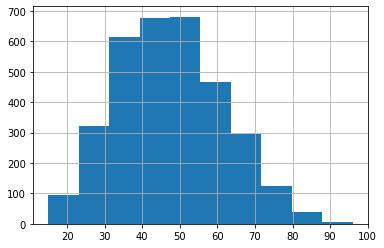

In [4]:
df_M = df[df['SEXO'] == 'M']

df_M['IDADE'].hist()

<AxesSubplot:>

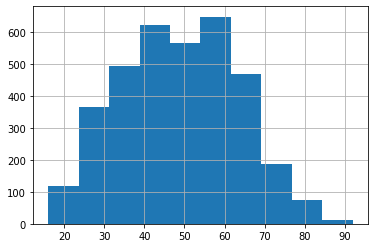

In [5]:
df_F = df[df['SEXO'] == 'F']

df_F['IDADE'].hist()

Exiba um BoxPlot das idades de acordo com o sexo do reclamante para ver se as diferenças ficam mais óbvias. 

**Dica:** Para exibir boxplots agrupados por categoria, use o método `boxplot` como no exemplo: `df.boxplot(column='IDADE', by = 'SEXO')`.

<AxesSubplot:title={'center':'IDADE'}, xlabel='SEXO'>

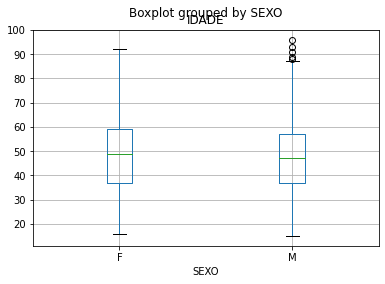

In [6]:
df.boxplot(column='IDADE', by = 'SEXO')

## Seleção dos dados

Nesta etapa vamos filtrar apenas linhas com os tipos de relamação (assuntos) mais comuns.

- Faça uma contagem dos assuntos mais comuns (usando `groupby`). Revise o procedimento no tutorial de Manipulação e Agregação de Dados, se necessário.
- Crie uma lista contendo os assuntos com mais de 60 reclamações. Armazene a lista em uma variável para uso posterior.

**Dica:** Para criar uma lista a partir de uma coluna de valores, use o comando `list()` como no exemplo: `list(df_grouped_top['ASSUNTO'])`

In [7]:
df_grouped = df.groupby(['ASSUNTO']).size().reset_index(name='count')

df_grouped.head()

,ASSUNTO,count
0,ABORDAGEM SOCIAL DE RUA - ADULTO,321
1,ABORDAGEM SOCIAL DE RUA - CRIANÇA,16
2,AFORAMENTO,1
3,ANIMAIS,116
4,ANIMAIS DOMÉSTICOS,107


In [8]:
df_grouped_top = df_grouped[df_grouped['count'] > 60]

lista_top = list(df_grouped_top['ASSUNTO'])

lista_top

['ABORDAGEM SOCIAL DE RUA - ADULTO',
 'ANIMAIS',
 'ANIMAIS DOMÉSTICOS',
 'COLETA',
 'DISQUE SOLIDARIEDADE',
 'DRENAGEM',
 'FAUNA SINANTRÓPICA',
 'FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS',
 'ILUMINAÇÃO PÚBLICA',
 'LIMPEZA',
 'MOTORISTAS, COBRADORES E PORTEIROS',
 'OUTROS SETORES SMS',
 'POLUIÇÃO',
 'POSTO DE SAÚDE',
 'SEMÁFORO',
 'TRÂNSITO',
 'UNIDADE DE PRONTO ATENDIMENTO',
 'ÁRVORE']

Crie um novo DataFrame contendo apenas reclamações contidas na lista das reclamações mais comuns.

**Dica:** Para filtrar linhas que contêm valores de uma lista, use o método `isin()`. Por exemplo, `df['ASSUNTO'].isin(lista_top)` retorna uma lista de valores True/False que pode ser usada para selecionar as linhas de interesse.

In [9]:
df_filtered = df[df['ASSUNTO'].isin(lista_top)]

df_filtered.head()

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE
0,2016-09-12,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,1,19
1,2016-12-11,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,2,45
4,2016-06-12,19:01:01,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",19,36
5,2016-09-12,21:52:22,ABORDAGEM SOCIAL DE RUA - ADULTO,reboucas,M,1978-06-20,Abordagem realizada. Pessoa foi encaminhada pa...,21,38
6,2016-06-12,23:46:39,ABORDAGEM SOCIAL DE RUA - ADULTO,jardim botanico,M,1982-02-02,A pessoa da solicitação já faz parte da rede d...,23,34


## Análise de similaridades entre reclamações de bairros

Queremos agora identificar bairros com problemas similares. Use o método `crosstab()` para gerar um novo DataFrame com os bairros nas colunas e os assuntos (os mais comuns, filtrados acima) nas linhas. 

In [10]:

df_cross = pd.crosstab(df_filtered['ASSUNTO'], df_filtered['BAIRRO_ASS'])

df_cross

BAIRRO_ASS,abranches,agua verde,ahu,alto boqueirao,alto da gloria,alto da rua xv,atuba,augusta,bacacheri,bairro alto,...,sitio cercado,taboao,taruma,tatuquara,tingui,uberaba,umbara,vila izabel,vista alegre,xaxim
ASSUNTO,,,,,,,,,,,,,,,,,,,,,
ABORDAGEM SOCIAL DE RUA - ADULTO,2,8,4,3,5,6,2,0,7,2,...,4,0,0,1,1,0,0,0,1,0
ANIMAIS,0,0,1,7,1,0,0,2,1,2,...,7,0,0,5,1,8,3,1,3,2
ANIMAIS DOMÉSTICOS,1,1,0,4,0,0,0,0,3,5,...,7,0,0,4,0,10,1,0,0,7
COLETA,15,41,17,31,4,13,7,4,34,86,...,60,1,28,19,13,47,5,7,26,47
DISQUE SOLIDARIEDADE,1,4,2,5,0,4,1,0,2,4,...,9,1,0,2,2,3,2,1,4,6
DRENAGEM,0,1,0,5,0,0,2,0,2,0,...,5,0,1,2,2,5,2,1,1,3
FAUNA SINANTRÓPICA,1,2,0,2,2,1,0,0,2,1,...,6,0,0,1,1,3,1,0,1,4
FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS,1,13,1,2,0,2,1,1,0,0,...,7,0,0,3,0,9,2,0,2,4
ILUMINAÇÃO PÚBLICA,12,22,9,29,5,11,12,2,21,26,...,45,3,14,22,4,38,7,4,8,36


Usando o DataFrame obtido anteriormente, gere a matriz de correlações entre bairros (método `corr()`).

In [11]:
df_cross.corr()

BAIRRO_ASS,abranches,agua verde,ahu,alto boqueirao,alto da gloria,alto da rua xv,atuba,augusta,bacacheri,bairro alto,...,sitio cercado,taboao,taruma,tatuquara,tingui,uberaba,umbara,vila izabel,vista alegre,xaxim
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,,,
abranches,1.000000,0.643055,0.884902,0.970722,0.123024,0.791709,0.794544,0.777465,0.874166,0.903948,...,0.963485,0.465605,0.907070,0.883269,0.844186,0.954435,0.678211,0.624121,0.854907,0.975221
agua verde,0.643055,1.000000,0.858102,0.623982,0.741225,0.872836,0.791846,0.457873,0.797828,0.637879,...,0.587818,0.204879,0.812256,0.517301,0.634941,0.653743,0.781724,0.907642,0.687336,0.670143
ahu,0.884902,0.858102,1.000000,0.848473,0.389906,0.914807,0.807990,0.714865,0.935760,0.886528,...,0.852842,0.358148,0.955636,0.693846,0.852803,0.870747,0.737892,0.818051,0.917330,0.860442
alto boqueirao,0.970722,0.623982,0.848473,1.000000,0.156873,0.759529,0.817464,0.774408,0.831386,0.854039,...,0.934172,0.446280,0.876565,0.902115,0.832988,0.952150,0.756346,0.648789,0.819032,0.972161
alto da gloria,0.123024,0.741225,0.389906,0.156873,1.000000,0.489287,0.515642,-0.098966,0.419315,0.067272,...,0.074968,-0.087167,0.303575,0.126778,0.150834,0.118885,0.521474,0.684358,0.111794,0.177159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uberaba,0.954435,0.653743,0.870747,0.952150,0.118885,0.750817,0.788739,0.832935,0.851041,0.888634,...,0.960357,0.433171,0.906221,0.890315,0.787015,1.000000,0.764711,0.654870,0.871909,0.942704
umbara,0.678211,0.781724,0.737892,0.756346,0.521474,0.736560,0.889417,0.585468,0.702908,0.542919,...,0.662525,0.440778,0.728206,0.703325,0.529311,0.764711,1.000000,0.829250,0.620305,0.720214
vila izabel,0.624121,0.907642,0.818051,0.648789,0.684358,0.774724,0.776734,0.439727,0.786965,0.633023,...,0.592859,0.257679,0.780455,0.545508,0.643710,0.654870,0.829250,1.000000,0.681306,0.690296


Use um Heatmap para exibir as correlações com cores.

In [12]:
df_corr = df_cross.corr()
df_corr = df_corr.style.background_gradient(cmap='RdBu')
df_corr

É possível perceber algum padrão entre os bairros baseando-se nas correlações obtidas?

## Análise de bairros mais problemáticos

Agora nosso interesse é determinar os bairros com mais reclamações.

- Crie um DataFrame com a contagem de reclamações por bairro (usando a coluna BAIRRO_ASS).
- Exiba os dados usando um gráfico de barras para visualizarmos os bairros com mais reclamações

In [13]:
df_total_bairros = df.groupby('BAIRRO_ASS').size().reset_index(name="count")

df_total_bairros

,BAIRRO_ASS,count
0,abranches,52
1,agua verde,201
2,ahu,50
3,alto boqueirao,153
4,alto da gloria,87
...,...,...
70,uberaba,194
71,umbara,47
72,vila izabel,33
73,vista alegre,60


<AxesSubplot:ylabel='BAIRRO_ASS'>

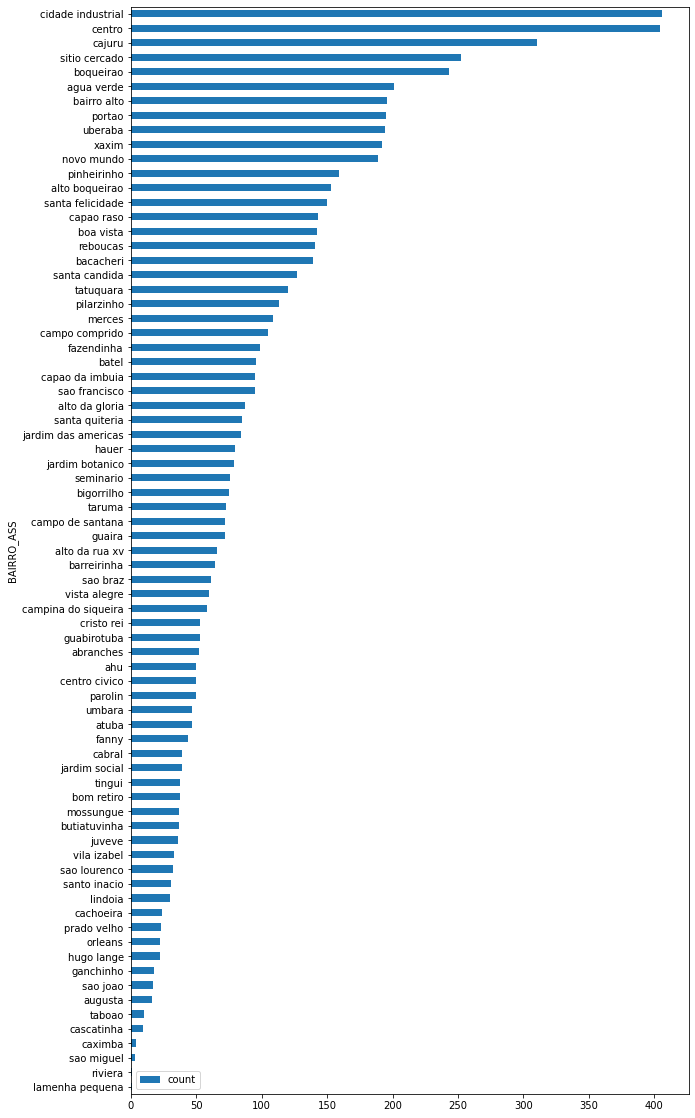

In [14]:
df_total_bairros.sort_values('count').plot.barh(x='BAIRRO_ASS', y='count', figsize=(10, 20))

O problema de considerar apenas o total de reclamações é que não estamos considerando a população dos bairros. Então o ideal é calcular a *taxa* de reclamações, ou seja, o número de reclamações por habitante do bairro.

- Crie um novo DataFrame a partir dos dados do arquivo `../data/dados_bairros.csv`.
- Converta os nomes dos bairros deste DataFrame para caixa-baixo (minúsculo).
- Faça uma junção do DataFrame de totais por bairro com o novo DataFrame.

**Dica:** Para especificar as colunas contendo os valores base para a junção, especifique os parâmetros `left_on` e `right_on` no método `merge`.

In [15]:
df_bairros = pd.read_csv('../data/dados_bairros.csv')

df_bairros['Bairro'] = df_bairros['Bairro'].str.lower()

df_merged = df_total_bairros.merge(df_bairros, left_on='BAIRRO_ASS', right_on='Bairro')

df_merged.head()

,BAIRRO_ASS,count,Bairro,AreaKm2,Homens,Mulheres,Total,Domicilios,RendimentoDom
0,abranches,52,abranches,"4,32",5463,5702,11165,3154,"1009,67"
1,agua verde,201,agua verde,"4,76",22546,27320,49866,17045,"3332,57"
2,ahu,50,ahu,"1,84",5117,6031,11148,3608,"2827,81"
3,alto da gloria,87,alto da gloria,"0,88",2513,3075,5588,2125,"3263,47"
4,atuba,47,atuba,"4,27",6156,6476,12632,3627,"1211,6"


Crie uma nova coluna chamada *taxa* contendo o resultado da divisão da coluna de contagem de reclamações pela coluna de total de habitantes.

In [16]:
df_merged['taxa'] = df_merged['count'] / df_merged['Total']

df_merged.head()

,BAIRRO_ASS,count,Bairro,AreaKm2,Homens,Mulheres,Total,Domicilios,RendimentoDom,taxa
0,abranches,52,abranches,"4,32",5463,5702,11165,3154,"1009,67",0.004657
1,agua verde,201,agua verde,"4,76",22546,27320,49866,17045,"3332,57",0.004031
2,ahu,50,ahu,"1,84",5117,6031,11148,3608,"2827,81",0.004485
3,alto da gloria,87,alto da gloria,"0,88",2513,3075,5588,2125,"3263,47",0.015569
4,atuba,47,atuba,"4,27",6156,6476,12632,3627,"1211,6",0.003721


Exiba um gráfico de barras mostrando os bairros de acordo com a taxa de reclamações.

<AxesSubplot:ylabel='Bairro'>

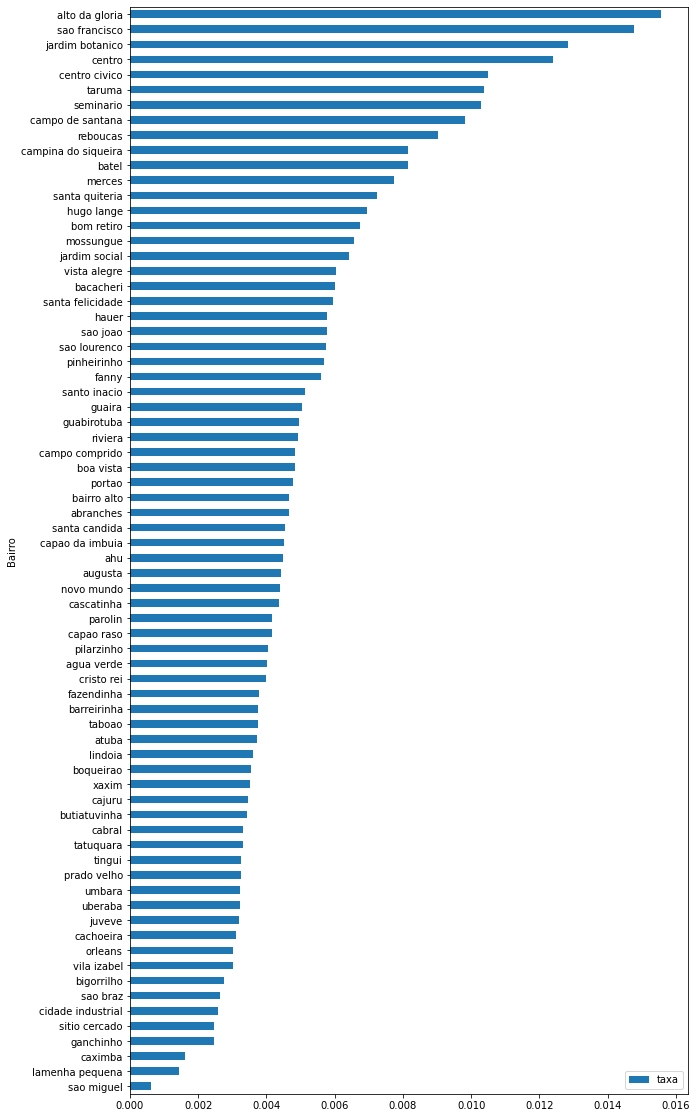

In [17]:
df_merged.sort_values('taxa').plot.barh(x='Bairro', y='taxa', figsize=(10, 20))

## Analisando tendências temporais

Vamos agora identificar os meses com mais reclamações. 

- Usando o DataFrame completo (lido a partir do CSV), converta a coluna *DATA* para o tipo `datetime`. Revise o tutorial de Limpeza de Dados se necessário.
- Agrupe as linhas contando as reclamações por mês. Revise o tutorial de Análise Exploratória se necessário.
- Exiba um gráfico de linha com a evolução da contagem.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATA            6866 non-null   object
 1   HORARIO         6866 non-null   object
 2   ASSUNTO         6866 non-null   object
 3   BAIRRO_ASS      6866 non-null   object
 4   SEXO            6866 non-null   object
 5   DATA_NASC       6866 non-null   object
 6   RESPOSTA_FINAL  6866 non-null   object
 7   HORA            6866 non-null   int64 
 8   IDADE           6866 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 482.9+ KB


In [19]:
df['DATA'] = pd.to_datetime(df['DATA'])

#obtem o mes e ano de uma data
df['mes_ano'] = df['DATA'].dt.to_period("M") 

df

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE,mes_ano
0,2016-09-12,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,1,19,2016-09
1,2016-12-11,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,2,45,2016-12
2,2017-11-01,12:11:12,CRM-AF/SMS,sao francisco,F,1957-04-08,Alendronato de sódio 70 mg e Carbonato de cálc...,12,60,2017-11
3,2016-12-14,10:19:29,CRM-AF/SMS,sao francisco,F,1938-08-18,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,10,78,2016-12
4,2016-06-12,19:01:01,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",19,36,2016-06
...,...,...,...,...,...,...,...,...,...,...
6861,2016-11-28,13:04:25,DRENAGEM,cidade industrial,M,1968-04-14,SEM POSSIBILIDADE DE ATENDIMENTO FACE SUSPENSÃ...,13,48,2016-11
6862,2016-12-22,10:11:15,TRÂNSITO,juveve,M,1989-05-18,"Informamos que encaminhamos a viatura 430, às ...",10,27,2016-12
6863,2016-11-26,21:03:07,ABORDAGEM SOCIAL DE RUA - CRIANÇA,sao francisco,F,1977-11-25,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",21,39,2016-11
6864,2016-03-11,15:54:31,NOVO MOBILIÁRIO URBANO,prado velho,F,1982-03-15,"Prezada cidadã, informamos que a sua solicitaç...",15,34,2016-03


<AxesSubplot:xlabel='mes_ano'>

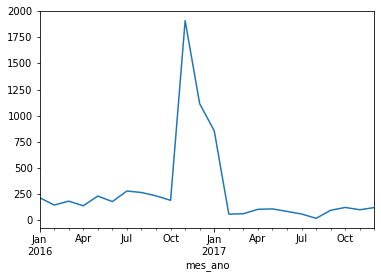

In [20]:
df.groupby(['mes_ano']).size().plot()